#                      Day 43
                        

# Q1. Problem Statement: Support Vector Machine (SVM) Algorithm

# You   are   given   a   dataset –“breast_cancer.csv.” Load the   dataset   into   a DataFrame.  Now,  Considering  the “diagnosis”column  as  the  target  variable, perform the  following tasks:

# You are given a dataset – “breast_cancer.csv.” Load the dataset into aDataFrame. Now, Considering the “diagnosis” column as the target variable,
perform the following tasks:


# 1. Declare feature vectors and the target variable and perform data analysis using correlation matrix and heatmap 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
df  = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [4]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.shape

(569, 6)

Text(0.5, 1.0, 'Data corelation')

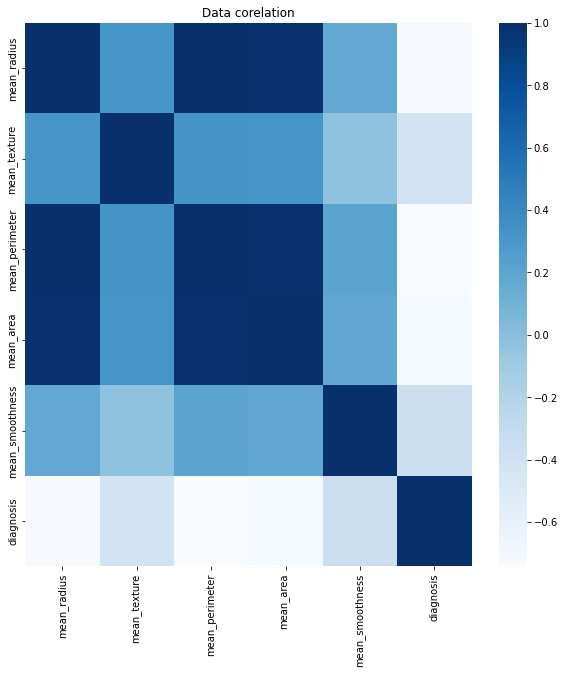

In [8]:
# Plot the data as a heat map
corr  = df.corr()
fig = plt.figure(figsize=(10,10))
hm=sns.heatmap(corr,cmap='Blues')
hm.set_title("Data corelation")

# 2. Split the data into test and train fragments using train_test_split() function in 80:20 ratio (80% train, 20% test)

In [9]:
x = df.drop('diagnosis' , axis=1)
y = df.diagnosis

In [10]:
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 5)
(114, 5)
(455,)
(114,)


In [14]:
import sys
print("After splitting the data:")
print("size of input train data:",sys.getsizeof(x_train))
print("size of input test data:",sys.getsizeof(x_test))
print("size of input train data:",sys.getsizeof(y_train))
print("size of input test data:",sys.getsizeof(y_test))

After splitting the data:
size of input train data: 21856
size of input test data: 5488
size of input train data: 7296
size of input test data: 1840


# 3. Build a Linear SVM and calculate the accuracy of the mode

In [15]:
svc_df = SVC(C=10,kernel='linear')
svc_df.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [16]:
y_pred = svc_df.predict(x_test)

In [17]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1], dtype=int64)

In [18]:
df_svc_acc = accuracy_score(y_test,y_pred)
print("Accuracy score of linear model:",df_svc_acc)

Accuracy score of linear model: 0.9035087719298246


# 4. Build a Gaussian RBF SVM and calculate the accuracy of the model

In [19]:
svc_df_rbf = SVC(C=10,kernel='rbf',gamma=2)
svc_df_rbf.fit(x_train,y_train)

SVC(C=10, gamma=2)

In [20]:
y_pred_rbf = svc_df_rbf.predict(x_test)
y_pred_rbf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [22]:
df_svc_acc_rbf = accuracy_score(y_test,y_pred_rbf)
print("Accuracy score of linear model:",df_svc_acc_rbf)

Accuracy score of linear model: 0.631578947368421
